# Replicating Predictive Modelling

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter

### Dataset

In [23]:
file_path = "./TUANDROMD.csv"
df = pd.read_csv(file_path)

df.iloc[:, :-1] = df.iloc[:, :-1].fillna(df.iloc[:, :-1].median())                                                      #copilot helped me with this line (filling missing values with median)

label_encoder = LabelEncoder()                                                                                        
df['Label'] = label_encoder.fit_transform(df['Label'])  # malware = 1, goodware = 0

class_counts = Counter(df['Label'])                                                                                     #pergunta professora (retirar depois)
print("Class distribution:", class_counts)

X, y = df.drop(columns=['Label']), df['Label']

scaler = StandardScaler()                                                                                                                        
X_scaled = scaler.fit_transform(X)


Class distribution: Counter({1: 3565, 0: 899, 2: 1})


### Classifiers

In [24]:
classifiers = {                                                                                                          #chatgpt helped me with the necessary parameters for each classifier                                              
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=50, class_weight='balanced'),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=50, class_weight='balanced'),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=50),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=50)
}

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)
results = {}

for name, classifier in classifiers.items():
    scores = cross_val_score(classifier, X_scaled, y, cv=kfold, scoring='accuracy')
    results[name] = scores.mean()
    print(f"{name}: {scores.mean():.4f}")

/home/miragaia/miniconda3/envs/ds/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Random Forest: 0.9924


/home/miragaia/miniconda3/envs/ds/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Extra Trees: 0.9931


/home/miragaia/miniconda3/envs/ds/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


AdaBoost: 0.9698


/home/miragaia/miniconda3/envs/ds/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


XGBoost: 0.9913


/home/miragaia/miniconda3/envs/ds/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Gradient Boosting: 0.9875


### Graphic

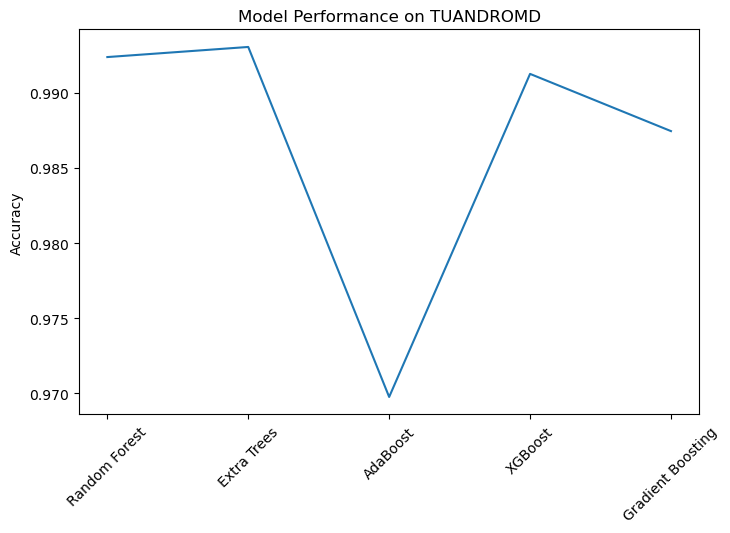

In [26]:
plt.figure(figsize=(8,5))
sns.lineplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.title('Model Performance on TUANDROMD')
plt.show()